# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Learning rates comparison
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\lucan\AppData\Local\Temp\ipykernel_20736\394667699.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Create the data

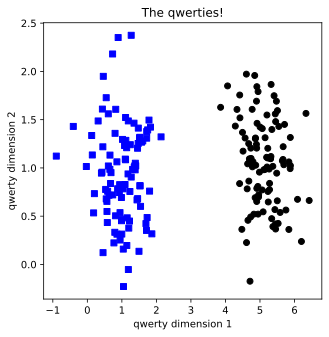

In [13]:
# parameters
nPerClust = 100
blur = 0.5

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [14]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
        )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [15]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  
  
  # final forward pass
  predictions = ANNmodel(data)
    
  # compute the predictions and report accuracy
  # NOTE: shouldn't it be predictions>.5??
  totalacc = 100*torch.mean(((predictions>0) == labels).float())
  
  return losses,predictions,totalacc

# Test the new code by running it once

Final accuracy: 50%


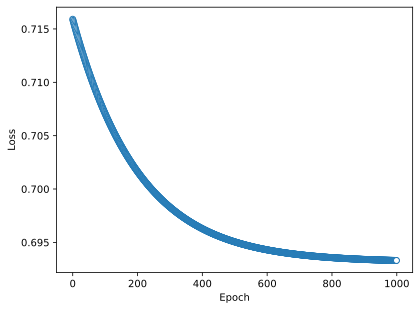

In [26]:
# create everything
ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Now for the experiment

In [42]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1, 40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# loop through learning rates
for i,lr in enumerate(learningrates):
  print(lr)

  # create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  # store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()


0.001
0.0035384615384615385
0.006076923076923077
0.008615384615384615
0.011153846153846153
0.013692307692307691
0.016230769230769233
0.01876923076923077
0.02130769230769231
0.023846153846153847
0.026384615384615385
0.028923076923076923
0.031461538461538464
0.034
0.03653846153846154
0.03907692307692308
0.04161538461538462
0.044153846153846155
0.04669230769230769
0.04923076923076923
0.05176923076923077
0.05430769230769231
0.056846153846153845
0.05938461538461538
0.06192307692307693
0.06446153846153846
0.067
0.06953846153846154
0.07207692307692308
0.07461538461538461
0.07715384615384616
0.07969230769230769
0.08223076923076923
0.08476923076923078
0.08730769230769231
0.08984615384615385
0.09238461538461538
0.09492307692307693
0.09746153846153846
0.1


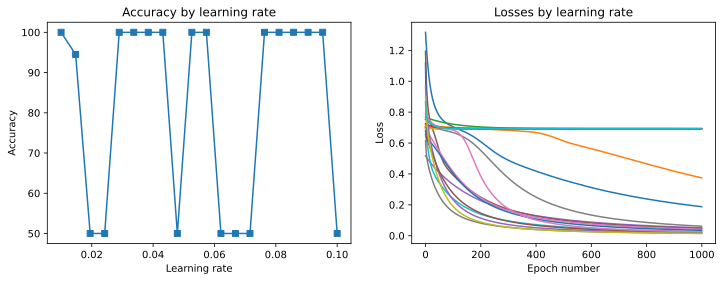

In [28]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [29]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.6500)

# Run a meta-experiment to get more reliable results

0.001
0.0035384615384615385
0.006076923076923077
0.008615384615384615
0.011153846153846153
0.013692307692307691
0.016230769230769233
0.01876923076923077
0.02130769230769231
0.023846153846153847
0.026384615384615385
0.028923076923076923
0.031461538461538464
0.034
0.03653846153846154
0.03907692307692308
0.04161538461538462
0.044153846153846155
0.04669230769230769
0.04923076923076923
0.05176923076923077
0.05430769230769231
0.056846153846153845
0.05938461538461538
0.06192307692307693
0.06446153846153846
0.067
0.06953846153846154
0.07207692307692308
0.07461538461538461
0.07715384615384616
0.07969230769230769
0.08223076923076923
0.08476923076923078
0.08730769230769231
0.08984615384615385
0.09238461538461538
0.09492307692307693
0.09746153846153846
0.1
0.001
0.0035384615384615385
0.006076923076923077
0.008615384615384615
0.011153846153846153
0.013692307692307691
0.016230769230769233
0.01876923076923077
0.02130769230769231
0.023846153846153847
0.026384615384615385
0.028923076923076923
0.0314615

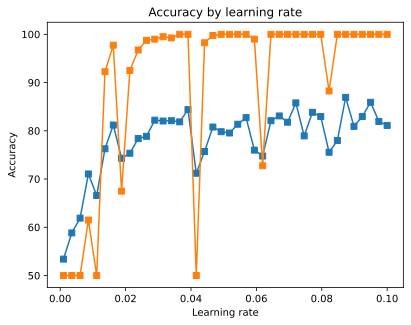

In [43]:
# run a "meta-experiment" by repeating the experiment N times
#  (different random weight initializations each time)
# note: this cell takes ~7 mins.

# number of times to iterate through the experiment
numExps = 50

# matrix to store all results
accMeta = np.zeros((numExps,len(learningrates)))

# fewer epochs to reduce computation time
numepochs = 500

# now for the experiment
for expi in range(numExps):
  for i,lr in enumerate(learningrates):
    print(lr)
    # create and run the model
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

    # store the results
    accMeta[expi,i] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.plot(learningrates,np.median(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

(50, 40)


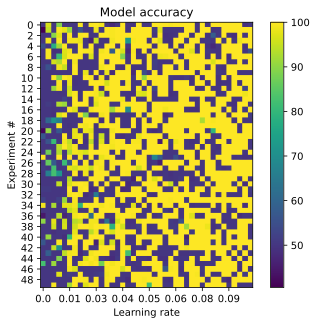

In [50]:
print(accMeta.shape)
plt.figure()
plt.imshow(accMeta)
plt.xlabel("Learning rate")
plt.ylabel("Experiment #")
plt.title("Model accuracy")
plt.xticks(range(0, 40, 5), np.round(learningrates[::5], 2))
plt.yticks(range(0, 50, 2))
plt.colorbar()
plt.show()

# Additional explorations

In [ ]:
# 1) The closeness of the qwerties groups is determined by the XY locations of the centroids, and by the blur parameter.
#    Try increasing or decreasing the blur (e.g., to 2 or .5). How does this affect the number of times that the model
#    successfully learned to categorize the two conditions?
#         Decreasing blur to 0.5 still resulted in models with 50% accuracy (other models are 100%). This means that there are still local
#         minima to get stuck in, even though the data is clearly separate

# 2) The mean of a set of numbers is easily interpretable only if the data are roughly normally or uniformly distributed 
#    (see lecture "Mean and variance" in Math section). Do you think the mean is a valid description of the performance
#    of the model's accuracy in the meta-experiment? Use a different metric (e.g., one we discussed in this video!) and 
#    plot that result on the same graph as the average. You might need to do some normalization to get them in the same 
#    range. Does this alternative method lead to a different conclusion?
#         Plotting the median better shows the performance, I think. While we need to increase the number of repetitions a bit, it shows that
#         the average stays around 75%, while later learning rates clearly improve.

# 3) Related to the previous comment, perhaps showing an image of the performance (variable accMeta) would be more 
#    appropriate. Create a heat map that shows learning rate on the x-axis, experiment repetitions on the y-axis, and
#    the final accuracy in color. Label the axes and specify suitable color boundaries.
#         The heatmap shows that low learning rates perform worse, but does not show any improvement once the LR is 'reasonable'. However, this is the same information form the median plot.